1  - Juntando as imagens em uma só

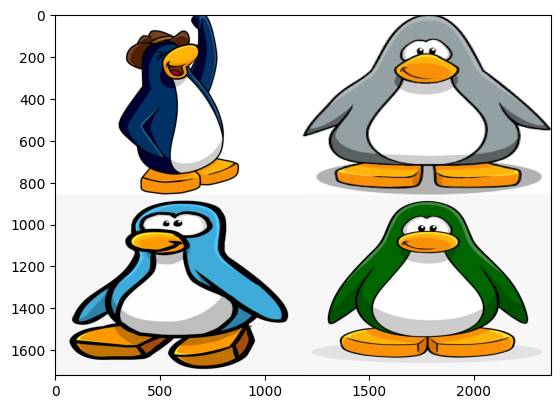

In [43]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

p1 = Image.open('P1.png')
p2 = Image.open('P2.png')
p3 = Image.open('P3.jpg')
p4 = Image.open('P4.png')

img1 = np.array(p1)
img2 = np.array(p2)
img3 = np.array(p3)
img4 = np.array(p4)

altura = max(img1.shape[0], img2.shape[0], img3.shape[0], img4.shape[0])
largura = max(img1.shape[1], img2.shape[1], img3.shape[1], img4.shape[1])

# Redimensionar as imagens para que todas tenham o mesmo tamanho
p1 = p1.resize((altura, largura))
p2 = p2.resize((altura, largura))
p3 = p3.resize((altura, largura))
p4 = p4.resize((altura, largura))

altura_combinada = altura * 2
largura_combinada = largura * 2
nova_imagem = Image.new('RGB', (altura_combinada, largura_combinada))

nova_imagem.paste(p1, (0, 0))
nova_imagem.paste(p2, (altura, 0))
nova_imagem.paste(p3, (0, largura))
nova_imagem.paste(p4, (altura, largura))

plt.imshow(np.array(nova_imagem))
plt.show()

nova_imagem.save('imagem_combinada.png')

2 - Trocar a cor dos pinguins

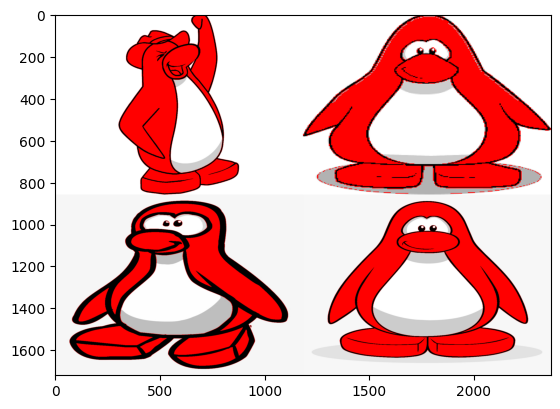

In [44]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

imagem_combinada = Image.open('imagem_combinada.png')

img = np.array(imagem_combinada)

# Criando uma máscara para ignorar o fundo e os traços pretos
mask = np.all(img > [177, 177, 177], axis=-1)
black_mask = np.all(img < [30, 30, 30], axis=-1)

# Aplicando uma nova cor nos pinguins
color = [255, 0, 0]  # vermelho
nova_img = img.copy()
nova_img[~mask & ~black_mask] = color

nova_img = Image.fromarray(nova_img)

plt.imshow(np.array(nova_img))

nova_img.save('cor_trocada.png')

3 - Aplicar o espelhamento

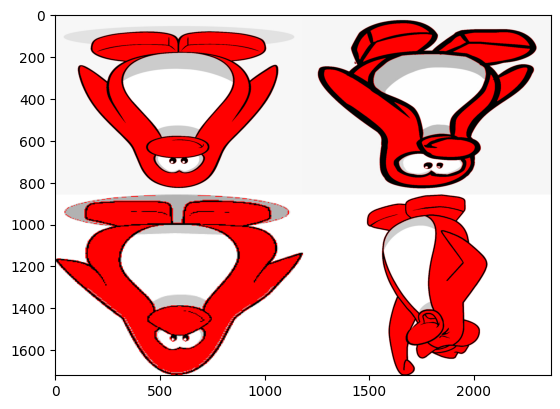

In [45]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

imagem_combinada = Image.open('cor_trocada.png')

img = np.array(imagem_combinada)

def reverse_x(img):
    img_copy = np.zeros(shape=img.shape, dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_copy[i, j] = img[i, img.shape[1] - j - 1]
    return img_copy

def reverse_y(img):
    img_copy = np.zeros(shape=img.shape, dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_copy[i, j] = img[img.shape[0] - i - 1, j]
    return img_copy

def mirror(img, apply_reverse_x=False, apply_reverse_y=False):

    if apply_reverse_x:
        img = reverse_x(img)
    if apply_reverse_y:
        img = reverse_y(img)
    
    # Plot image
    plt.imshow(img)
    return img

imagem_invertida = mirror(img, apply_reverse_x=True, apply_reverse_y=True)
# make image from array
imagem_invertida = Image.fromarray(imagem_invertida)
imagem_invertida.save('imagem_refletida.png')

4 - Recortar algum pinguim

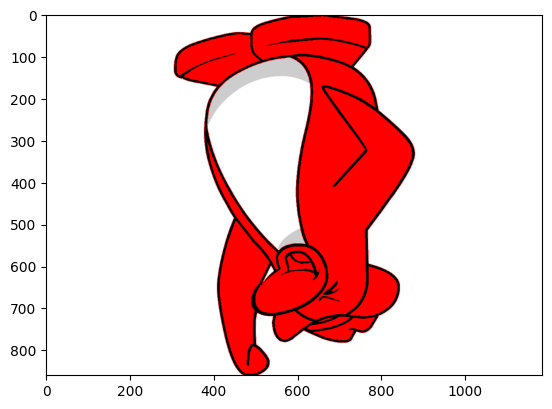

In [46]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

imagem_combinada = Image.open('imagem_refletida.png')

img = np.array(imagem_combinada)

altura, largura, _ = img.shape

altura_h = altura // 2
largura_h = largura // 2

quarto_quadrante = img[altura_h:altura, largura_h:largura]

nova_img = Image.fromarray(quarto_quadrante)

plt.imshow(nova_img)
plt.show()
nova_img.save('pinguim_recortado.png')

5 - Faça a analise do histograma em um pinguim e escolha um valor de threshold.

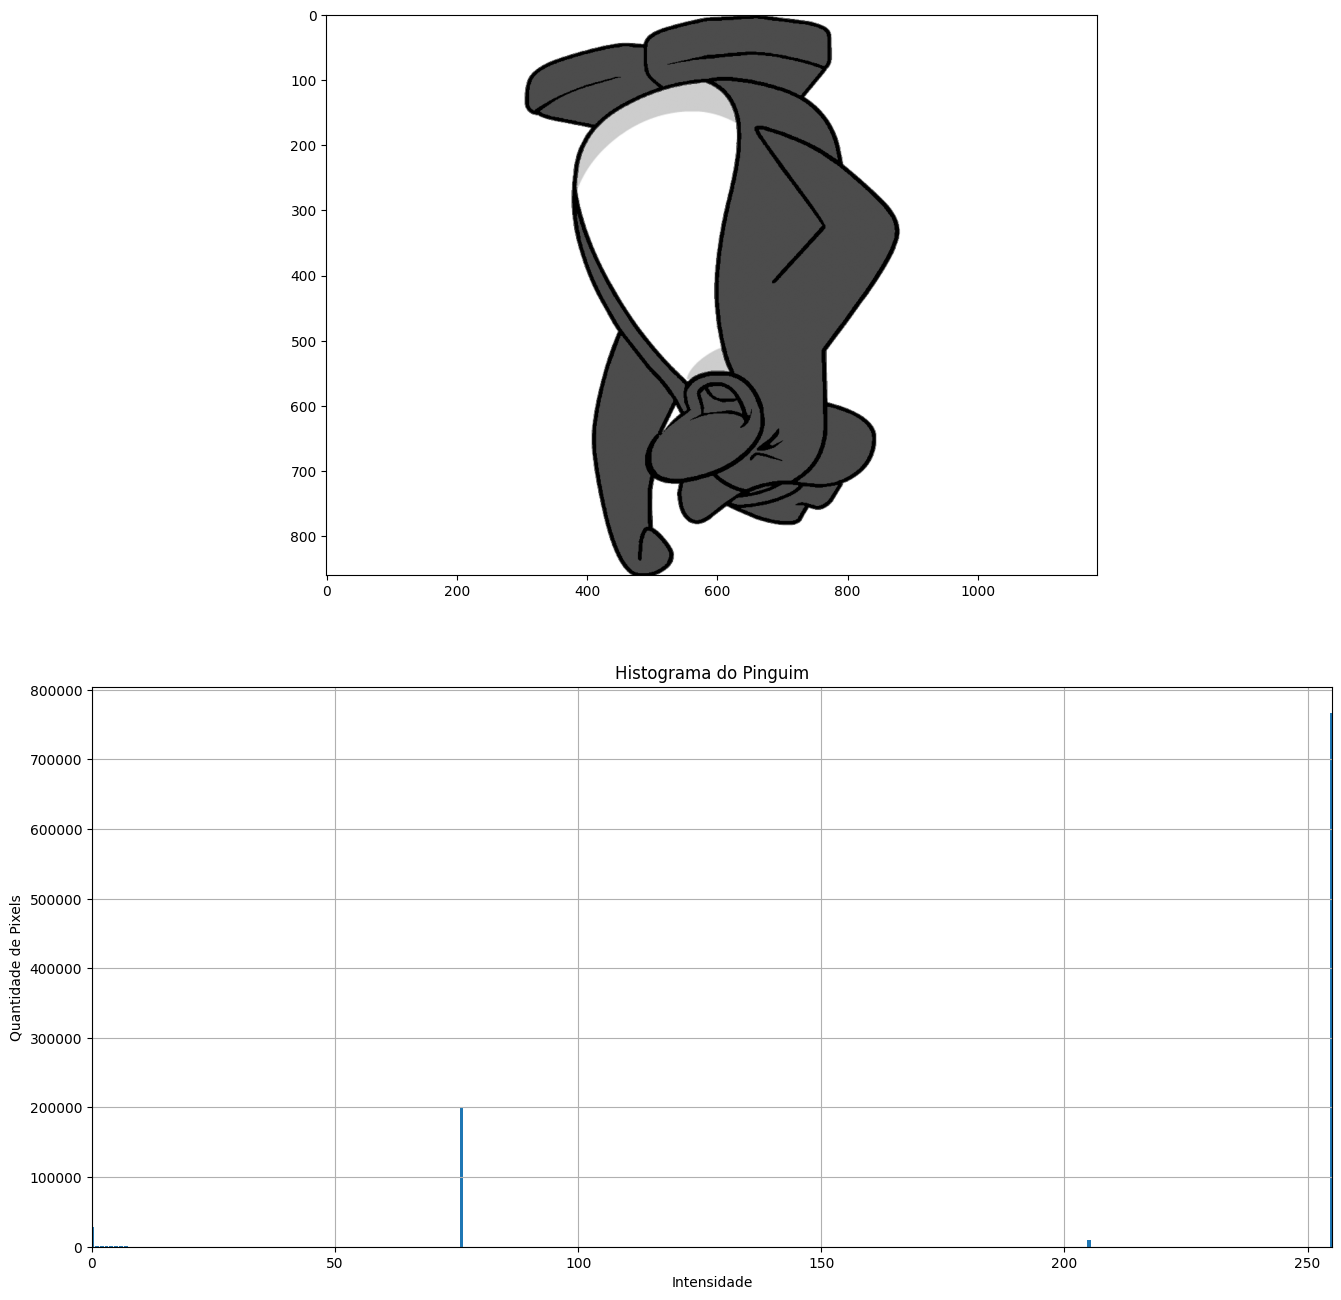

In [47]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Funções para calcular e mostrar o histograma
def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)
    plt.title('Histograma do Pinguim')
    plt.xlabel('Intensidade')
    plt.ylabel('Quantidade de Pixels')
    plt.xlim(0, 255)
    plt.grid()

pin_image = Image.open('pinguim_recortado.png') 
img = np.array(pin_image.convert('L'))  # Converter para escala de cinza

show_histogram_gray(img)

threshold = 128  # Um threshold de 128 é escolhido porque é o ponto médio da escala de cinza (0-255)

6 - Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de alguma cor

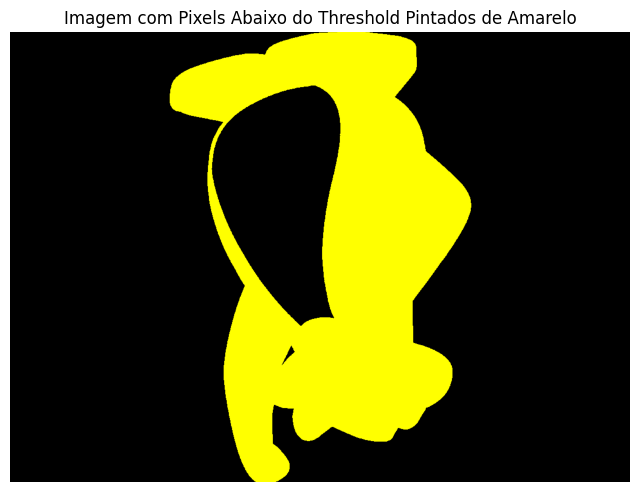

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

pin_image = Image.open('pinguim_recortado.png') 
img = np.array(pin_image.convert('L'))  # Converter para escala de cinza

threshold = 128  # Valor de threshold

imagem_cor = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

amarelo = [255, 255, 0]  
imagem_cor[img < threshold] = amarelo  

imagem_colorida = Image.fromarray(imagem_cor)

plt.figure(figsize=(8, 8))
plt.imshow(imagem_colorida)
plt.axis('off')  # Remove os eixos
plt.title('Imagem com Pixels Abaixo do Threshold Pintados de Amarelo')
plt.show()

imagem_colorida.save('pinguim_colorido.png')